In [1]:
import datetime

import matplotlib.pyplot as plt
import numpy as np

import metagames.functional as mf

In [2]:
default_agent_config = {
    'num_parameters': 10,
    'initializer': 'scaled_normal',
    'loss': 'utility',
    'optimizer': 'adam',
    'learning_rate': 1e-1,
    'step_rate': 1,
    'num_players': 10,
}

In [3]:
data = mf.main.run_experiment(
    experiment='free_for_all',
    game='prisoners_dilemma',
    num_steps=5000,
    agents_config=[{'agent': 'linear', 'name': 'lin'}],
    default_agent_config=default_agent_config,
    agent_seed=1,
    parameter_seed=2,
    progress_bar=True
)
stats = mf.data.experiment_step_statistics(data)

100%|██████████| 5000/5000 [10:46<00:00,  8.93it/s]


In [4]:
def plot(step_statistics, title=None, key='utility', logy=False):
    ax = plt.gca()
    if logy:
        plt_fn = plt.semilogy
    else:
        plt_fn = plt.plot
    for player, player_stats in step_statistics.items():
        plt_fn(player_stats[key]['mean'], label=player)

    ax.legend()
    ax.set_ylabel(key)
    ax.set_xlabel('Global Step')
    if title is not None:
        ax.set_title(title)

def run_plots(stats, agent_prefix):
    plt.figure(figsize=(16, 8))
    data = {key: value for key, value in stats.items() if key.startswith(agent_prefix)}
    plt.subplot(2, 2, 1)
    plot(data, key='utility')
    plt.subplot(2, 2, 2)
    plot(data, key='action_probability')
    plt.subplot(2, 2, 3)
    plot(data, key='grad_norm', logy=True)

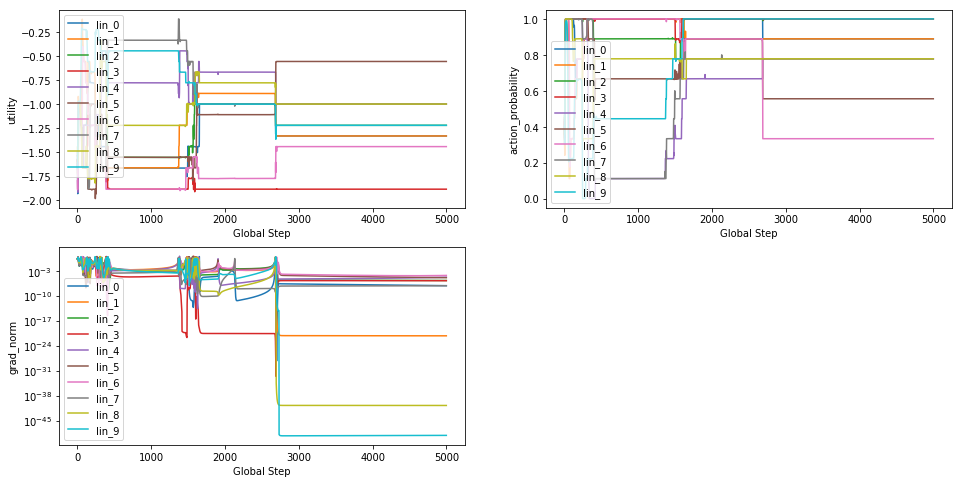

In [5]:
run_plots(stats, '')